# EXPLORATORY DATA ANALYSIS BITCOIN PRICE 

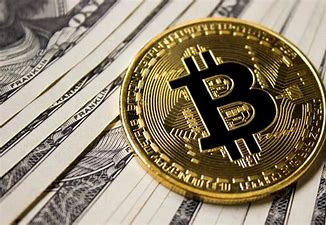

**Bitcoin Price dataset from 1 January, 2021 to 12 May, 2021 on 1 minute interval.**

## DESCRIPTION
### Context
This data set is generated by the help of Binance Api.

What is Binance Api?
The Binance API is a method that allows you to connect to the Binance servers via Python or several other programming languages. With it, you can automate your trading.

More specifically, Binance has a RESTful API that uses HTTP requests to send and receive data. Further, there is also a WebSocket available that enables the streaming of data such as price quotes and account updates.

### Content
In this data set the data is generated on the interval of 1 minute by an API. It includes many columns showing the real change in price of Bitcoin also shows the Open, High, Low, Close price of Bitcoin on particular minutes. The Open Time and Close Time in the data set are in Unix Timestamp.

## IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## READING THE DATASET

In [ ]:
bitcoin=pd.read_csv('/kaggle/input/bitcoin-price-usd/main.csv')

In [ ]:
bitcoin.sample(5)

In [ ]:
bitcoin.describe()

In [ ]:
len(bitcoin.columns)

In [ ]:
bitcoin.info()

<font color=white> <i><b>The only problem is of open time and close time of data which is provide in unix format, so we have to change it 

In [ ]:
from datetime import datetime
bitcoin['Open Time'] = bitcoin['Open Time'] // 1000
bitcoin['Open Time'] = bitcoin['Open Time'].apply(datetime.fromtimestamp)
bitcoin['Close Time'] = bitcoin['Close Time'] // 1000
bitcoin['Close Time'] = bitcoin['Close Time'].apply(datetime.fromtimestamp)
bitcoin.head()


In [ ]:
len(bitcoin.index)

In [ ]:
plt.figure(figsize = (20, 25))
plotnumber = 1
time=['Open Time','Close Time']
for column in bitcoin.drop(columns=time):
    if plotnumber <= len(bitcoin.columns):
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(bitcoin[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

<font color=Gold><i> Observation: There is a right skew in feature Volume, Quote asset volume, Number of trades Taker buy base asset volume. Hence these features are in Normal distribution. 

In [ ]:
bitcoin['Open Time']=[d.date() for d in bitcoin['Open Time']]
bitcoin['Close Time']=[e.date() for e in bitcoin['Close Time']]

In [ ]:
g=bitcoin.groupby(by=['Open Time','Close Time'])
t=g

In [ ]:
g=[np.array(g)[i][1].mean() for i in range(len(np.array(g)))]
gd=np.array(g)

In [ ]:
bitcoindate=pd.DataFrame(gd,columns=['Open', 'High', 'Low', 'Close', 'Volume',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume'])

In [ ]:
bitcoindate=bitcoindate.round(2)

In [ ]:
bitcoindate['date']=[np.array(t)[q][0][0] for q in range(len(np.array(g)))]

<b><i>Now the the data changed to date wise

In [ ]:
bitcoindate.head()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=bitcoindate.drop(['date'],axis=1),width=0.5)

In [ ]:
outlier=bitcoindate['Quote asset volume'].quantile(0.98)
bitcoindate=bitcoindate[bitcoindate['Quote asset volume']<outlier]
outlier=bitcoindate['Taker buy quote asset volume'].quantile(0.98)
bitcoindate=bitcoindate[bitcoindate['Taker buy quote asset volume']<outlier]

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=bitcoindate.drop(['date'],axis=1),width=0.5)

In [ ]:
plt.figure(figsize = (20, 25))
plotnumber = 1
time=['date']
for column in bitcoindate.drop(columns=time):
    if plotnumber <= len(bitcoindate.columns)-1:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(bitcoin[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

In [ ]:
# from pandas_profiling import ProfileReport
# profile_report=ProfileReport(bitcoindate, title='bitcoindate report',explorative=True)
# profile_report

In [ ]:
plt.figure(figsize=(18,5.5))
plt.subplot(1,3,1)
corr=bitcoindate.corr()
sns.heatmap(corr,vmin=0,vmax=1)
plt.subplot(1,3,2)
sns.heatmap(bitcoindate[['Open','High','Low','Close']].corr(),vmin=0,vmax=1)
plt.subplot(1,3,3)
corr=bitcoindate.drop(columns=['Open','High','Low','Close']).corr()
sns.heatmap(corr,vmin=0,vmax=1)
plt.tight_layout()

<font color=gold><i>Observation: Column Open High Low and Close are highly correlated with each other, or they have same characterstics but have a very less correlation with ohter features. But there is high correlation in between the feature 'Taker buy base asset volume ' and 'Quote asset volume'.
There is also a very good correlation in between the features Volume, Quote asset volume, Number of traders, Taker buy base asset, volume taker buy quote asset volume.

In [ ]:
sns.barplot(y='Open',x=pd.DatetimeIndex(bitcoindate['date']).month,data=bitcoindate)
plt.xlabel('month')

<font color=Gold><i> There is an avg increase in opening price of bitcoin every month of year 2021 

In [ ]:

(bitcoindate.Open-bitcoindate.Close).mean()

In [ ]:
(bitcoindate.High-bitcoindate.Low).mean()

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(y=[bitcoindate.Open.mean(),bitcoindate.Close.mean()],x=['Open','Close'])
plt.subplot(1,2,2)
sns.barplot(y=[bitcoindate.High.mean(),bitcoindate.Low.mean()],x=['High','Low'])
plt.tight_layout

<font color=Gold>There is very less change in open and close price of bitcoin, high and low price of bitcoin through out the months 

In [ ]:
bitcoindate['date'][0].month

In [ ]:
plt.figure(figsize=(22,15))
li=['January','February','march','April','May']
color=['red','green','blue','orange','yellow']
peakdata=[]
sum=0
k=0
for p in range(1,6):
    date=[str(i)[-2:] for i in bitcoindate['date'] if i.month==p]
    plt.subplot(2,3,p)
    sum=sum+len(date)
    peakdata.append(max(bitcoindate['Open'][k:sum]))
    plt.scatter(date,bitcoindate['Open'][k:sum])
    plt.plot(date,bitcoindate['Open'][k:sum],color=color[p-1])
    k=sum
    plt.title(li[p-1])
plt.subplot(2,3,6)
plt.scatter(li,peakdata)
plt.plot(li,peakdata)
plt.title('PEAK OF OPENING PRICE OF bitcoin IN PAST MONTH')
plt.tight_layout

# sns.pointplot(y=bitcoindate['Open'][:30],data=bitcoindate,color='g')

<i> <font color=Gold>According to monthly analysis Opening price of the bitcoin for the first five months, there is fluctuating increment in between the date of 5 to 12 and the peak occurs in between these dates . But for the month May there is peak occures on date of 9 ,according to my analysis hence now there is not such a high increment in opening price. 
    As there is saturation occuring in the peak of opening price of data.

In [ ]:
sns.pairplot(bitcoindate[['Volume', 'Quote asset volume',
       'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume','date']])

<b><font color=Gold> All the features have a positive covariance with each other <br></font></b>
<i> In this pairplot, feature 'number of trades' have a perfect domed shape structure and perfectly log normal distibuted or normal distributed and it is highly correlated with all features as mentioned in pairplot.
    so it will be a perfect independent variable for all the dependent variable in pairplot w.r.t 'number of trades'.

In [ ]:

i=sns.JointGrid(x='Volume',y='Taker buy base asset volume',data=bitcoindate)
i.plot(sns.regplot,sns.distplot,color='blue')
j=sns.JointGrid(x='Quote asset volume',y='Taker buy quote asset volume',data=bitcoindate)
j.plot(sns.regplot,sns.distplot,color='green')

<i> <b> There is Domed shaped structure of data so it is Normally distributed data.
    
    * Feature "Quote asset Volume" is highly correlated with "Taker buy Quote asset volume" and linearly distributed with positive covariance.
    * Feature "Volume" is highly correlated with "Taker buy base asset volume" and linearly distributed with positive covariance.
    

In [ ]:
plt.subplot
plt.plot(bitcoindate['date'],bitcoindate['Number of trades'])

In [ ]:
plt.figure(figsize=(22,15))
peakdat=[]
sum=0
k=0
for p in range(1,6):
    date=[str(i)[-2:] for i in bitcoindate['date'] if i.month==p]
    plt.subplot(2,3,p)
    sum=sum+len(date)
    peakdat.append(max(bitcoindate['Number of trades'][k:sum]))
    plt.scatter(date,bitcoindate['Number of trades'][k:sum])
    plt.plot(date,bitcoindate['Number of trades'][k:sum],color=color[p-1])
    k=sum
    plt.title(li[p-1])
plt.subplot(2,3,6)
plt.scatter(li,peakdat)
plt.plot(li,peakdat)
plt.title('PEAK OF NUmber of trades OF bitcoin IN PAST MONTH')
plt.tight_layout

<i><font color=Gold> The peak of the bitcoin is decreasing or may be constant, this will not be a perfect analysis of the data.</font>

In [ ]:
# work in progress ... thank you ... pls upvotes